In [74]:
import pandas as pd
from strategy import Strategy
from league import League
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = Strategy.load_dataset('db.csv')
df = df.rename(columns={
        f"bet365_1X2 Full Time_outcome_{i}_closing_value": f"bet365_{i}" for i in range(1, 4)
})

df['result'] = df[['score_ft_1', 'score_ft_2']].apply(lambda x: League.cpt_winner(x[0], x[1]), axis=1)


Found file


In [81]:
import os
strategies = os.listdir('strategies')
print(f"NUMBER: {len(strategies)}")
strategies.sort(key=lambda x: - os.path.getmtime(f'strategies/{x}'))
print('\n'.join(strategies))

NUMBER: 70
strategy_P_rank_1__3M_G_rank_2__3.json
strategy_P_rank_1__3M_G_rank_2__2.json
strategy_P_rank_1__3M_G_rank_2__1.json
strategy_P_rank_1__3M_A_P_rank_2__3.json
strategy_P_rank_1__3M_A_P_rank_2__2.json
strategy_P_rank_1__3M_A_P_rank_2__1.json
strategy_P_rank_1__3M_P_rank_2__3.json
strategy_P_rank_1__3M_P_rank_2__2.json
strategy_P_rank_1__3M_P_rank_2__1.json
strategy_P_rank_1__A_GA_rank_2__3.json
strategy_P_rank_1__A_GA_rank_2__2.json
strategy_P_rank_1__A_GA_rank_2__1.json
strategy_P_rank_1__H_GA_rank_2__3.json
strategy_P_rank_1__H_GA_rank_2__2.json
strategy_P_rank_1__H_GA_rank_2__1.json
strategy_P_rank_1__GA_rank_2__3.json
strategy_P_rank_1__GA_rank_2__2.json
strategy_P_rank_1__GA_rank_2__1.json
strategy_P_rank_1__A_G_rank_2__3.json
strategy_P_rank_1__A_G_rank_2__2.json
strategy_P_rank_1__A_G_rank_2__1.json
strategy_P_rank_1__H_G_rank_2__3.json
strategy_P_rank_1__H_G_rank_2__2.json
strategy_P_rank_1__H_G_rank_2__1.json
strategy_P_rank_1__G_rank_2__3.json
strategy_P_rank_1__G_ra

In [82]:
dic = {}
for s in strategies:
    strategy = Strategy.load_strategy_from_file(f'strategies/{s}')
    matches, gain_by_year = Strategy.analyze_strategy(strategy, df)
    print(s)
    print(strategy)
    result = strategy.get('result')
    matches = matches.reset_index(drop=True)
    strategy_stats = {}
    strategy_stats["n_matches"] = len(matches)
    strategy_stats["total_revenue"] = matches.gain.sum()
    strategy_stats["roi"] = matches.gain.sum() / len(matches) * 100
    strategy_stats["n_wins"] = len(matches[matches.result == result])
    strategy_stats["winning_rate"] = len(matches[matches.result == result]) / len(matches) * 100
    strategy_stats["avg_odd"] = matches[f'bet365_{result}'].mean()
    
    print(strategy_stats)
    print()
    dic[s] = strategy_stats

    #print(f'Number of matches: {len(matches)}')
    #print(f'Total revenue (with 1 euro bets): {matches.gain.sum()}')
    #print(f'ROI: {matches.gain.sum() / len(matches) * 100}%')
    #print(f'Winning bets: {len(matches[matches.result == result])} / {len(matches)}')
    #print(f'Winning rate: {len(matches[matches.result == result]) / len(matches) * 100} %')
    #print(f"Average odd: {matches[f'bet365_{result}'].mean()}")

strategy_P_rank_1__3M_G_rank_2__3.json
{'P_rank_1': [12, 26], '3M_G_rank_2': [4, 14], 'result': 3, 'bet365_3': [5.5600000000000005, 9.35]}
{'n_matches': 1861, 'total_revenue': 210.75, 'roi': 11.324556689951638, 'n_wins': 312, 'winning_rate': 16.76518001074691, 'avg_odd': 6.765045674368619}

strategy_P_rank_1__3M_G_rank_2__2.json
{'P_rank_1': [11, 14], '3M_G_rank_2': [2, 13], 'result': 2, 'bet365_2': [6.529999999999999, 8.81]}
{'n_matches': 84, 'total_revenue': 80.0, 'roi': 95.23809523809523, 'n_wins': 22, 'winning_rate': 26.190476190476193, 'avg_odd': 7.482142857142857}

strategy_P_rank_1__3M_G_rank_2__1.json
{'P_rank_1': [12, 25], '3M_G_rank_2': [3, 28], 'result': 1, 'bet365_1': [4.57, 8.77]}
{'n_matches': 3335, 'total_revenue': 367.23, 'roi': 11.011394302848576, 'n_wins': 643, 'winning_rate': 19.280359820089956, 'avg_odd': 5.926680659670166}

strategy_P_rank_1__3M_A_P_rank_2__3.json
{'P_rank_1': [2, 6], '3M_A_P_rank_2': [18, 25], 'result': 3, 'bet365_3': [4.4, 9.559999999999999]}
{'n

strategy_P_rank_1__A_P_rank_2__1.json
{'P_rank_1': [15, 26], 'A_P_rank_2': [1, 19], 'result': 1, 'bet365_1': [4.52, 8.82]}
{'n_matches': 3184, 'total_revenue': 337.93000000000006, 'roi': 10.613379396984927, 'n_wins': 608, 'winning_rate': 19.09547738693467, 'avg_odd': 5.997763819095478}

strategy_P_rank_1__H_P_rank_2__3.json
{'P_rank_1': [16, 27], 'H_P_rank_2': [1, 23], 'result': 3, 'bet365_3': [5.540000000000001, 7.3100000000000005]}
{'n_matches': 752, 'total_revenue': 145.0, 'roi': 19.28191489361702, 'n_wins': 143, 'winning_rate': 19.01595744680851, 'avg_odd': 6.30219414893617}

strategy_P_rank_1__H_P_rank_2__2.json
{'P_rank_1': [5, 13], 'H_P_rank_2': [16, 21], 'result': 2, 'bet365_2': [6.68, 9.85]}
{'n_matches': 149, 'total_revenue': 57.0, 'roi': 38.25503355704698, 'n_wins': 27, 'winning_rate': 18.120805369127517, 'avg_odd': 7.667785234899329}

strategy_P_rank_1__H_P_rank_2__1.json
{'P_rank_1': [4, 26], 'H_P_rank_2': [4, 27], 'result': 1, 'bet365_1': [4.6, 9.5]}
{'n_matches': 3960, '

strategy_H_P_rank_1__A_P_rank_2__1.json
{'H_P_rank_1': [12, 28], 'A_P_rank_2': [3, 16], 'result': 1, 'bet365_1': [4.2, 6.28]}
{'n_matches': 3675, 'total_revenue': 193.8, 'roi': 5.273469387755102, 'n_wins': 795, 'winning_rate': 21.63265306122449, 'avg_odd': 4.9074911564625845}

strategy_3M_H_G_rank_1__3M_A_GA_rank_2__3.json
{'3M_H_G_rank_1': [1, 16], '3M_A_GA_rank_2': [22, 27], 'result': 3, 'bet365_3': [1.11, 4.03]}
{'n_matches': 693, 'total_revenue': 27.28, 'roi': 3.9365079365079367, 'n_wins': 234, 'winning_rate': 33.76623376623377, 'avg_odd': 3.2005772005772006}

strategy_3M_P_rank_1__3M_P_rank_2__1.json
{'3M_P_rank_1': [16, 27], '3M_P_rank_2': [3, 12], 'result': 1, 'bet365_1': [4.15, 9.5]}
{'n_matches': 1913, 'total_revenue': 230.49, 'roi': 12.04861474124412, 'n_wins': 397, 'winning_rate': 20.752744380554102, 'avg_odd': 5.575389440669106}

strategy_3M_H_G_rank_1__3M_A_GA_rank_2__2.json
{'3M_H_G_rank_1': [4, 7], '3M_A_GA_rank_2': [5, 9], 'result': 2, 'bet365_2': [5.540000000000001, 7.

In [83]:
dic = dict(sorted(dic.items(), key=lambda item: - item[1]["total_revenue"]))
print([(k, v["total_revenue"]) for k, v in dic.items()])

[('strategy_P_rank_1__GA_rank_2__1.json', 408.78), ('strategy_P_rank_1__3M_P_rank_2__1.json', 390.39), ('strategy_3M_H_GA_rank_1__3M_A_G_rank_2__1.json', 390.2499999999999), ('strategy_H_GA_rank_1__A_G_rank_2__1.json', 386.2), ('strategy_P_rank_1__GA_rank_2__3.json', 382.0), ('strategy_P_rank_1__G_rank_2__1.json', 374.45), ('strategy_3M_H_GA_rank_coeff_1__3M_A_G_rank_coeff_2__1.json', 367.62), ('strategy_P_rank_1__3M_G_rank_2__1.json', 367.23), ('strategy_3M_G_rank_coeff_1__3M_GA_rank_coeff_2__1.json', 365.08000000000004), ('strategy_3M_P_rank_coeff_1__3M_P_rank_coeff_2__1.json', 353.38), ('strategy_P_rank_1__A_G_rank_2__1.json', 352.15), ('strategy_P_rank_1__A_P_rank_2__1.json', 337.93000000000006), ('strategy_P_rank_1__H_GA_rank_2__1.json', 337.0), ('strategy_P_rank_1__P_rank_2__1.json', 337.0), ('strategy_P_rank_1__3M_A_P_rank_2__1.json', 335.0), ('strategy_P_rank_1__H_G_rank_2__1.json', 323.75), ('strategy_P_rank_1__H_P_rank_2__1.json', 301.65000000000003), ('strategy_3M_P_rank_coe

In [84]:
STRATEGY = 'strategy_P_rank_1__GA_rank_2__3.json'

In [85]:
strategy = Strategy.load_strategy_from_file(f'strategies/{STRATEGY}')
strategy

{'P_rank_1': [3, 11],
 'GA_rank_2': [4, 13],
 'result': 3,
 'bet365_3': [7.960000000000001, 9.709999999999999]}

In [86]:
matches, gain_by_year = Strategy.analyze_strategy(strategy, df)
result = strategy.get('result')
matches = matches.reset_index(drop=True)
print(f'Number of matches: {len(matches)}')
print(f'Total revenue (with 1 euro bets): {matches.gain.sum()}')
print(f'ROI: {matches.gain.sum() / len(matches) * 100}%')
print(f'Winning bets: {len(matches[matches.result == result])} / {len(matches)}')
print(f'Winning rate: {len(matches[matches.result == result]) / len(matches) * 100} %')
print(f"Average odd: {matches[f'bet365_{result}'].mean()}")
print()

Number of matches: 2134
Total revenue (with 1 euro bets): 382.0
ROI: 17.90065604498594%
Winning bets: 294 / 2134
Winning rate: 13.776944704779757 %
Average odd: 8.598875351452671



In [87]:
print('Odds distribution')
print(matches[f'bet365_{result}'].value_counts())

Odds distribution
8.0    714
9.0    570
8.5    567
9.5    283
Name: bet365_3, dtype: int64


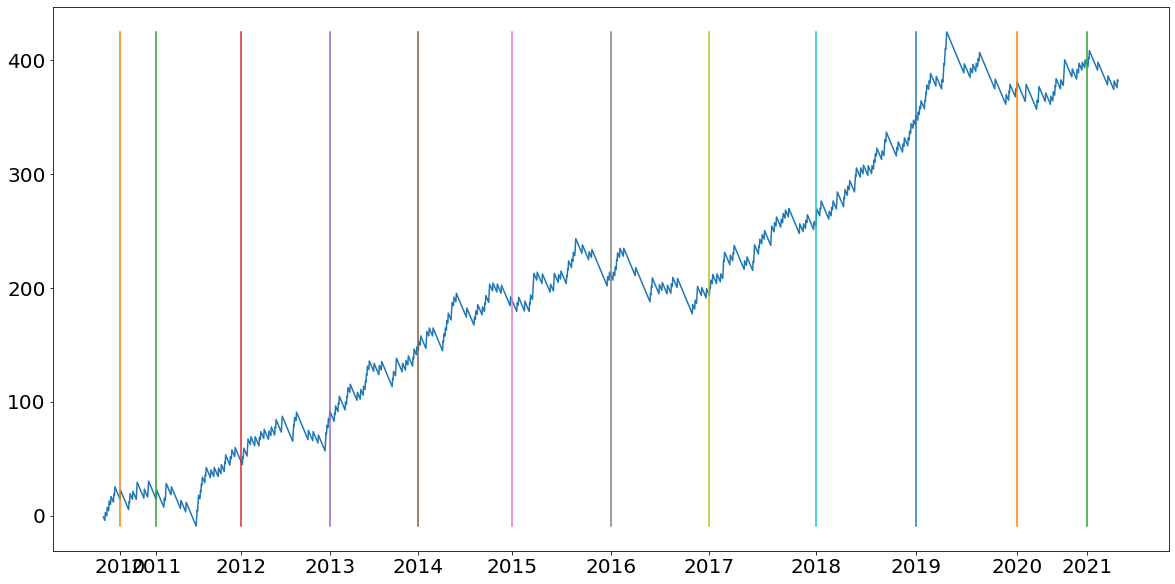

In [88]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [20, 10]
matplotlib.rcParams.update({'font.size': 20})
matches.cum_gain.plot()
index = []
label = []
for i in range(2010, 2022):
    x = matches[matches.date >= str(i)].index[0]
    plt.plot([x, x], [matches.cum_gain.min(), matches.cum_gain.max()])
    index.append(x),
    label.append(str(i))
xticks = plt.xticks(index, label)

<AxesSubplot:xlabel='year'>

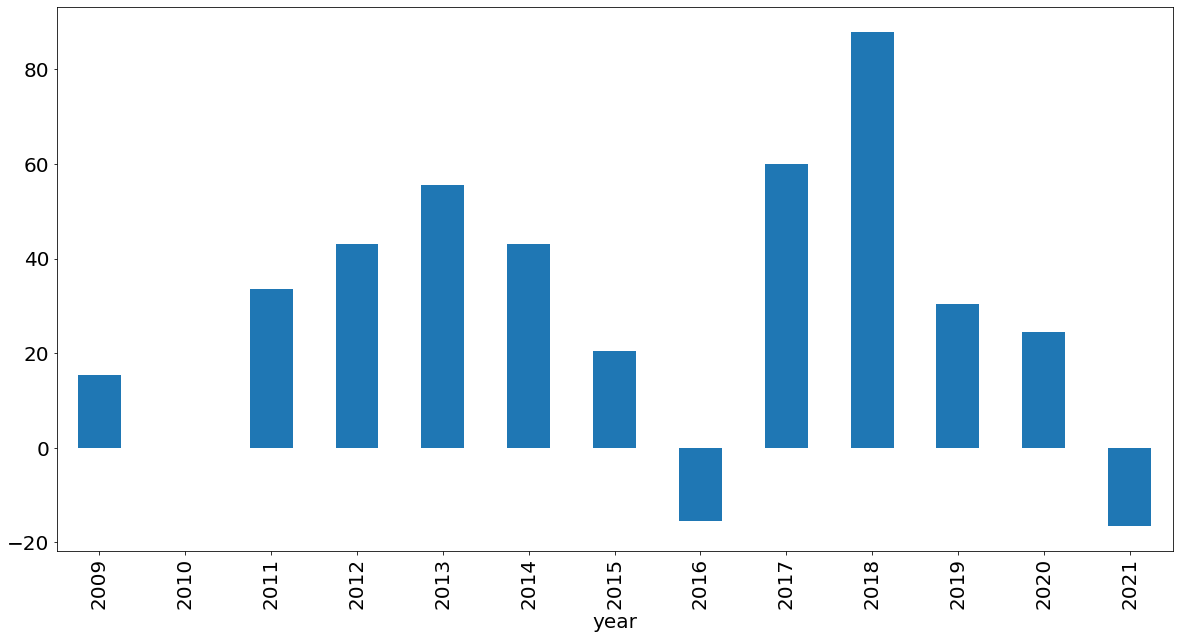

In [89]:
gain_by_year.plot.bar()

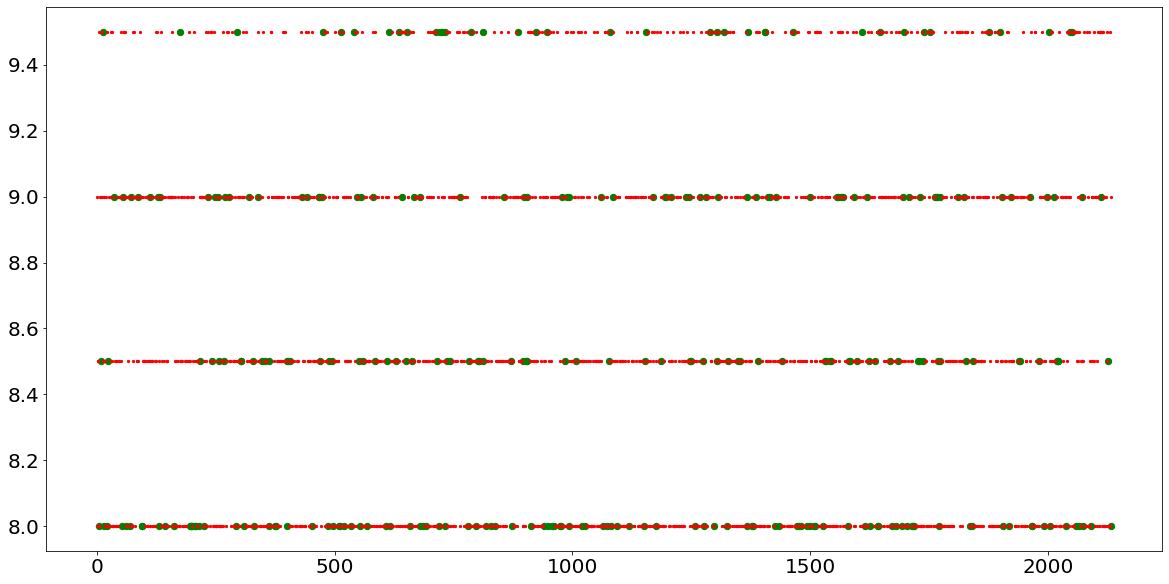

In [90]:
plt.scatter(x = matches[matches.gain > 0].index, y=matches[matches.gain > 0][f"bet365_{strategy.get('result')}"], s=40, color='green')
plt.scatter(x = matches[matches.gain < 0].index, y=matches[matches.gain < 0][f"bet365_{strategy.get('result')}"], color='red', s=5)

<AxesSubplot:xlabel='country'>

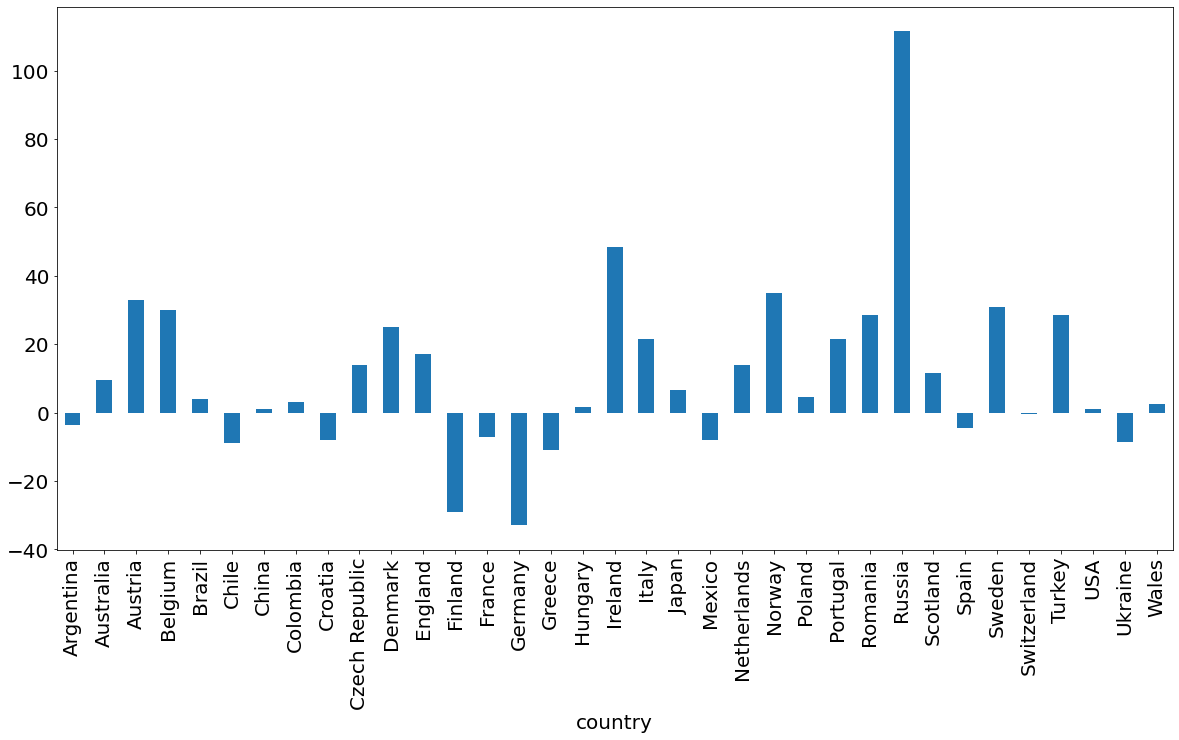

In [91]:
gain_by_country = matches.groupby(by='country')["gain"]
gain_by_country.sum().plot.bar()

<AxesSubplot:xlabel='league'>

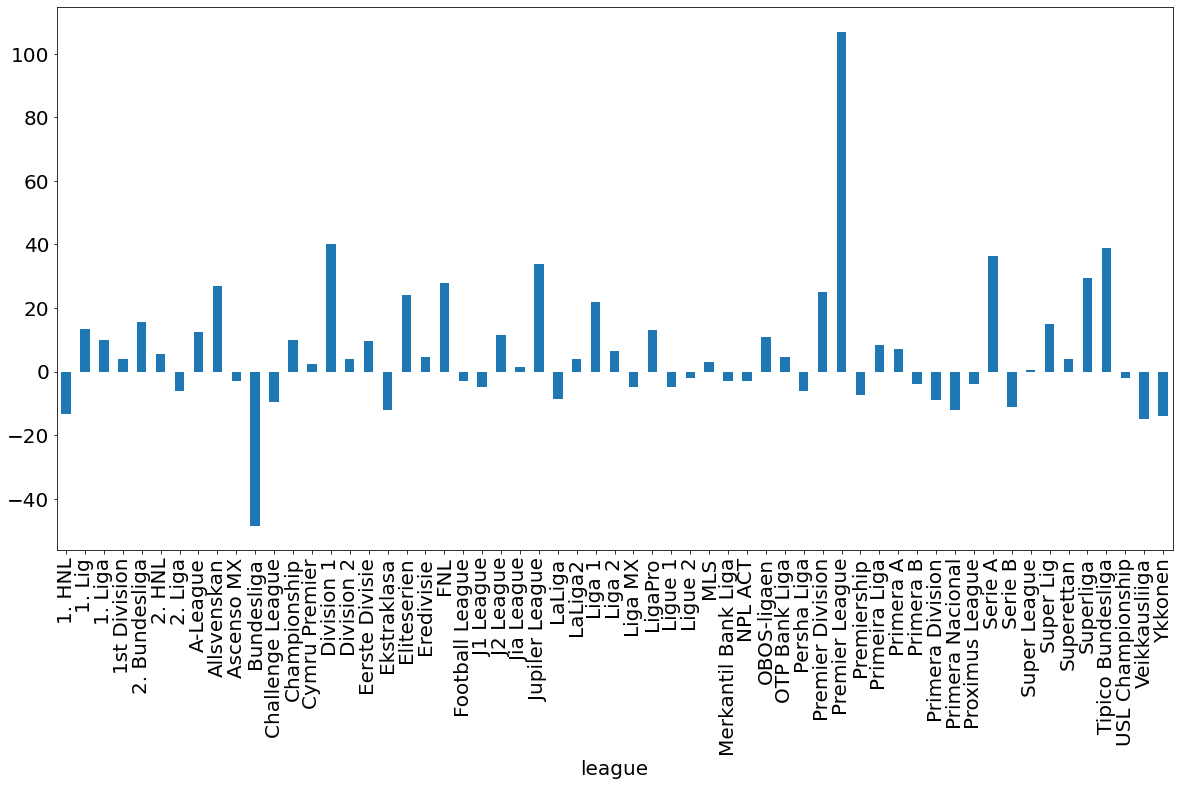

In [92]:
gain_by_league = matches.groupby(by='league')["gain"].sum()
gain_by_league.plot.bar()